In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # импорт библиотеки визуализации
import warnings
import numpy as np # библиотека для работы с матрицами
warnings.filterwarnings('ignore') # фильтр красных предупреждений

## Зачем линейные модели, когда есть KNN ?
Для ответа на этот вопрос, давайте построим границу классов

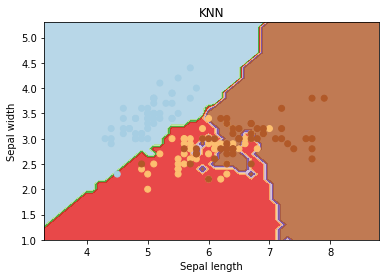

In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# import seaborn # Можно импортировать так, но тогда вместо вызова методов sns.*, например, sns.load_dataset('iris') придётся использовать длинное название seaborn.load_dataset('iris')
df = sns.load_dataset('iris')
X, y = df.iloc[:, :2], df['species'] # в качестве объектов-признаков берём первые две колонки, которую берём за целевую переменную

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X, y)
# создаём сетку для построения графика
h = 0.1 # размер ячейки
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1 # задаём интервалы значений для сетки
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), # делаем сетку значений
 np.arange(y_min, y_max, h))
 
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # получаем предсказания для этой сетки
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
 
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length') # оси и название укажем на английском
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('KNN')
plt.show()

Слишком сложная граница для такой задачи, не правда ли? Наверняка есть варианты решения попроще 

## Одномерная регрессия
Давайте сгенерируем одномерную регрессию (регрессию для объектов с одним признаком)

**Вопрос!** Сколько у такой модели параметров?

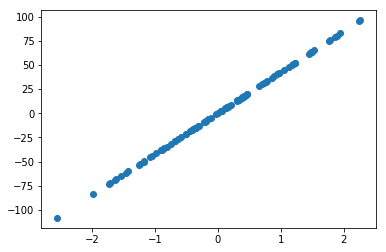

In [3]:
from sklearn.datasets.samples_generator import make_regression # метод для генерации 
X, y = make_regression(n_samples=100, n_features=1, random_state=0) # генерируем 100 объектов с 1 признаком
plt.scatter(X, y)

Обучим простую регрессию

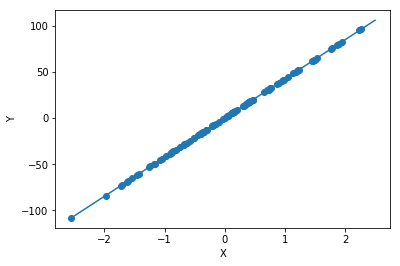

In [5]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

In [6]:
a, b

(42.38550485581796, 1.7763568394002505e-15)

Давайте теперь посмотрим, как может испортить картину всего 1 аномалия!

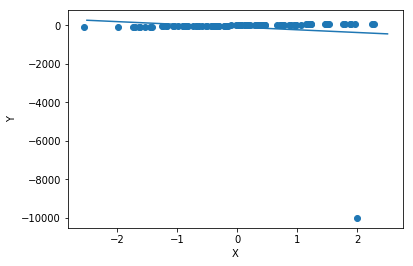

In [7]:
from sklearn.datasets.samples_generator import make_regression # метод для генерации 
X, y = make_regression(n_samples=100, n_features=1, random_state=0) # генерируем 100 объектов с 1 признаком
bad_point_x = 2
bad_point_y = -10000
X = np.concatenate([X, [[bad_point_x]]]) # добавим плохую точку к X
y = np.concatenate([y, [bad_point_y]]) # и к Y
clf = LinearRegression() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

In [7]:
a, b

(-141.57341423775807, -85.31318200434572)

Кривая стала проходить через данные хуже! Модель оказалась неустойчива к выбросам и аномалиям! "Плохая точка" утянула за собой кривую, и видим, что коэффициенты стали больше. Модель, устойчивая к выбросам, называется "робастной" (robust). Примером такой модели является HuberRegressor 

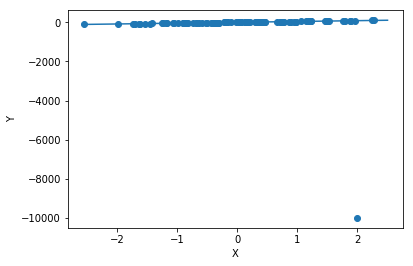

In [8]:
from sklearn.linear_model import HuberRegressor

clf = HuberRegressor() # инициализация регрессора (пока модель глупая и необученная)
clf.fit(X, y) # говорим модели, какие объекты какой ответ имеют. Модель на них обучается. В итоге модель выучит параметры a и b уравнения y = aX + b
a = clf.coef_[0] # коэффициент при первом (а он у нас 1) признаке
b = clf.intercept_
x_line = np.linspace(-2.5, 2.5) # зададим интервал значений для линии по оси X
y_line = a * x_line + b # подставим найденные коэффициенты a и b в уравнение прямой
plt.scatter(X, y) # нарисуем точки из обучающей выборки
plt.ylabel('Y') # подпишем ось Y
plt.xlabel('X') # подпишем ось X
plt.plot(x_line, y_line) # нарисуем прямую

Видим, что HuberRegressor'у пофиг на выброс!

## Многомерная регрессия

In [9]:
from sklearn.model_selection import train_test_split
n_features = 4 # выберите (разумное!) количество признаков > 1
X, y = make_regression(n_samples=100, n_features=n_features, random_state=0)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf = Pipeline([('prescaling', StandardScaler()), # нормируем данные
                ('regressor', LinearRegression())])
clf.fit(X_train, y_train)
from sklearn.metrics import r2_score # Критерий R2
preds_test = clf.predict(X_test)
r2_score(preds_test, y_test)

1.0

Несложно понять, что коэффициенты в регрессии - это важность признаков

In [10]:
regressor = clf.steps[1][1]
regressor.coef_ # коэффициенты

array([21.76998169, 31.92689391, 58.25631275, 89.60151974])

## (*) Более крутые методы многомерной регрессии

Однако, обучение многомерной регрессии чревато двумя вещами:
* Признаки могут сильно коррелировать друг с другом. В таком случае решений может быть много (**мультиколлинеарность**). Как бы среди кучи этих решений найти такое, в котором коэффициентов между разными признаками будет максимально поровну? Для этого есть модификация, называемая **RidgeRegression** (L2-регуляризация)
* А что, если некоторые признаки вообще нужно выкинуть? Для этого была придумана **Lasso regression** (L1-регуляризация)
* А что, если хочется и то, и то? **ElasticNet !** (L1 + L2 регуляризация)

В линейной регрессии придумали **штрафовать** за слишком большие коэффициенты. Этот подход называется **регуляризацией**

In [11]:
import pandas as pd
df = pd.read_csv('data/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
data = pd.get_dummies(df, columns=['Daily Summary', 'Summary', 'Precip Type'], drop_first=True).drop('Formatted Date', 1)

In [13]:
target_col = 'Temperature (C)'
X, y = data.drop(target_col, 1), data[target_col] # будем предсказывать признак rings на основе остальных

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1e-2, test_size=1e-2)

Попробуем для начала простую регрессию обучить и вывести топ-10 важных признаков

In [15]:
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
clf.fit(X_train, y_train)
feature_importances = list(sorted(zip(X.columns, clf.steps[1][1].coef_.squeeze()), key=lambda x: -abs(x[1]))) # объедим названия признаков и их важность в один список методом zip, отсортируем в порядке возрастания коэффициентов
pd.DataFrame(feature_importances, columns=['feature_name', 'feature_importance'])[:10]

,feature_name,feature_importance
0,Daily Summary_Light rain until morning.,7.869214e+13
1,Daily Summary_Breezy and foggy until morning.,7.252816e+13
2,Daily Summary_Mostly cloudy throughout the day...,5.189102e+13
3,Daily Summary_Breezy starting overnight contin...,-4.610223e+13
4,Daily Summary_Breezy until afternoon and mostl...,4.312550e+13
5,Daily Summary_Breezy overnight and mostly clou...,-4.268741e+13
6,Daily Summary_Breezy until afternoon and overc...,4.132889e+13
7,Daily Summary_Breezy in the morning and partly...,3.806852e+13
8,Daily Summary_Breezy starting in the afternoon...,-3.694883e+13
9,Daily Summary_Breezy and partly cloudy in the ...,3.512262e+13


In [18]:
from sklearn.metrics import r2_score
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

-3.980684210131328e+24

Явно не хватает регуляризации. Попробуем L1(Lasso) или L2(Ridge) regression

In [19]:
from sklearn.linear_model import Ridge
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=2.0))])
clf.fit(X_train, y_train)
feature_importances = list(sorted(zip(X.columns, clf.steps[1][1].coef_.squeeze()), key=lambda x: -abs(x[1]))) # объедим названия признаков и их важность в один список методом zip, отсортируем в порядке возрастания коэффициентов
pd.DataFrame(feature_importances, columns=['feature_name', 'feature_importance'])[:10]

,feature_name,feature_importance
0,Apparent Temperature (C),9.320623
1,Wind Speed (km/h),0.531742
2,Humidity,-0.259546
3,Summary_Breezy and Overcast,-0.144348
4,Daily Summary_Mostly cloudy throughout the day...,0.116890
5,Daily Summary_Mostly cloudy throughout the day.,-0.108263
6,Daily Summary_Partly cloudy until night and br...,0.101339
7,Daily Summary_Foggy starting in the morning.,-0.098928
8,Daily Summary_Mostly cloudy throughout the day...,-0.085880
9,Summary_Foggy,-0.084350


In [20]:
from sklearn.metrics import r2_score
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.9874366559790659

Что теперь будет, если очень большую регуляризацию сделать?

In [22]:
from sklearn.linear_model import Ridge
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=100000))])
clf.fit(X_train, y_train)
feature_importances = list(sorted(zip(X.columns, clf.steps[1][1].coef_.squeeze()), key=lambda x: -abs(x[1]))) # объедим названия признаков и их важность в один список методом zip, отсортируем в порядке возрастания коэффициентов
pd.DataFrame(feature_importances, columns=['feature_name', 'feature_importance'])[:10]

,feature_name,feature_importance
0,Apparent Temperature (C),0.088981
1,Humidity,-0.054924
2,Precip Type_snow,-0.049318
3,Visibility (km),0.033124
4,Summary_Partly Cloudy,0.025360
5,Summary_Foggy,-0.024722
6,Daily Summary_Partly cloudy throughout the day.,0.022404
7,Summary_Overcast,-0.021796
8,Daily Summary_Partly cloudy until night.,0.014534
9,Daily Summary_Foggy starting overnight continu...,-0.013401


In [23]:
from sklearn.metrics import r2_score
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.042530614087319174

In [30]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.grid_search import GridSearchCV


# Ridge
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Ridge())])
grid_params = {
    'regressor__alpha': [0, 1, 1.5, 2.0], # насколько большая будет регуляризация. Обратите внимание, что к названию параметра добавлися префикс "regressor__" в соответствии с названием пайплайна
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best RidgeRegression (train): %.5f' % gs.best_score_)
print('R2 for best RidgeRegression (test): %.5f' % r2_score(y_pred, y_test))
print('******************************')

# Lasso
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Lasso())])
grid_params = {
    'regressor__alpha': [0, 1, 1.5, 2.0], # насколько большая будет регуляризация
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best LassoRegression (train): %.5f' % gs.best_score_)
print('R2 for best LassoRegression (test): %.5f' % r2_score(y_pred, y_test))
print('******************************')


# ElasticNet
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', ElasticNet())])
grid_params = {
    'regressor__alpha': [0, 1, 1.5, 2.0], # насколько большая будет регуляризация
    'regressor__l1_ratio': [0.0, 0.1, 0.5, 0.8, 1.0] # какая доля L1 регуляризации по отношению к общей
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best ElasticNet (train): %.5f' % gs.best_score_)
print('R2 for best ElasticNet (test): %.5f' % r2_score(y_pred, y_test))
print('******************************')

R2 for best RidgeRegression (train): 0.98913
R2 for best RidgeRegression (test): 0.98836
******************************
R2 for best LassoRegression (train): 0.98891
R2 for best LassoRegression (test): 0.98825
******************************
R2 for best ElasticNet: 0.98891 (train)
R2 for best ElasticNet (test): 0.98825
******************************


In [31]:
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV

# Ridge
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', RidgeCV(alphas=[0, 1, 1.5, 2.0], cv=5))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('R2 for best RidgeRegression: %.5f' % r2_score(y_pred, y_test))
print('******************************')


# Lasso
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', LassoCV(alphas=[0, 1, 1.5, 2.0], cv=5))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('R2 for best LassoRegression: %.5f' % r2_score(y_pred, y_test))
print('******************************')


# ElasticNet
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', ElasticNetCV(alphas=[0, 1, 1.5, 2.0]))])
grid_params = {
    'regressor__l1_ratio': [0.0, 0.1, 0.5, 0.8, 1.0] # какая доля L1 регуляризации по отношению к общей
}
gs = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gs.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)
print('R2 for best ElasticNet: %.5f' % r2_score(y_pred, y_test))
print('******************************')

R2 for best RidgeRegression: 0.98836
******************************
R2 for best LassoRegression: 0.96138
******************************
R2 for best ElasticNet: 0.96138
******************************


# Классификация

# Логистическая регрессия

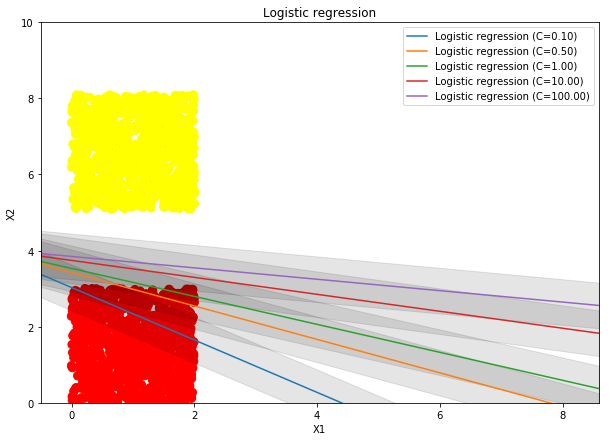

In [24]:
from sklearn.linear_model import LogisticRegression

# Сгенерируем точки двух классов
size = 1000
X1 = np.array([2 * np.random.random(size), 3 * np.random.random(size)]).transpose()
X2 = np.array([2 * np.random.random(size), 5.1 + 3 * np.random.random(size)]).transpose()
X = np.concatenate([X1, X2]) # схлопнем два массива в один
y = np.concatenate([np.zeros(size), np.ones(size)]) # схлопнем два массива меток классов в один

# X, y = make_classification(n_samples=50, n_features=2, n_informative=2, 
#                             n_redundant=0, n_clusters_per_class=1, random_state=0)

x_1 = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5) # задаём интервал значений для X1 (первого признака)


plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn') # Рисуем точки

for C in [0.1, 0.5, 1.0, 10., 100.]: # параметр логистической регрессии
    w = 0.6
    clf = LogisticRegression(C=C) # здесь можно не использовать Scaler(), потому что мы знаем, что признаки одного порядка
    clf.fit(X, y)
    x_2 = -(clf.intercept_ - clf.coef_.squeeze()[0] * x_1) / clf.coef_.squeeze()[1] # восстановим X2 из выученной кривой
    plt.plot(x_1, x_2, label='Logistic regression (C=%.2f)' % C) # нарисуем кривую решения (разделяющая поверхность)
    plt.fill_between(x_1, x_2 - w, x_2 + w, edgecolor='none', color='k', alpha=0.1)

plt.xlim(x_1[0], x_1[-1]) # диапазон значений по X
plt.ylim(0,10) # диапазон значений по Y
plt.title('Logistic regression') # заголовок
plt.xlabel('X1') # подпись оси X
plt.ylabel('X2') # подпись оси Y
plt.legend()
plt.show()

Коэффициенты (важности) признаков

In [33]:
clf.coef_

array([[-0.88857193,  5.12060021]])

# Метод опорных векторов
**Идея** - а давайте проведём разделяющую линию так, чтобы она максимально далеко проходила от обоих классов
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png)


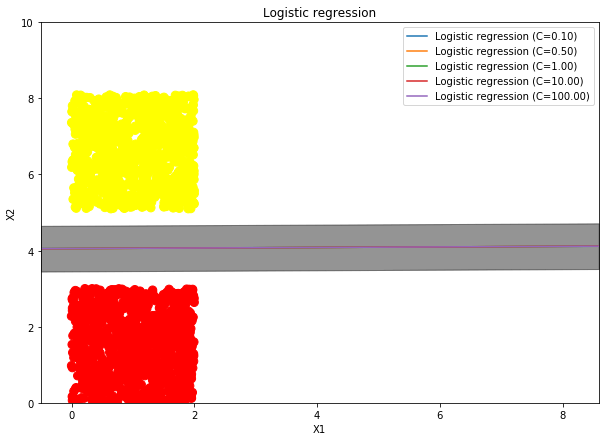

In [25]:
# http://scikit-learn.org/stable/modules/svm.html

from sklearn.svm import SVC # для классификации


size = 1000

x_1 = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5) # задаём интервал значений для X1 (первого признака)


plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn') # Рисуем точки

for C in [0.1, 0.5, 1.0, 10., 100.]: # параметр логистической регрессии
    w = 0.6
    clf = SVC(C=C, kernel='linear')
    clf.fit(X, y)
    x_2 = -(clf.intercept_ - clf.coef_.squeeze()[0] * x_1) / clf.coef_.squeeze()[1] # восстановим X2 из выученной кривой
    plt.plot(x_1, x_2, label='Logistic regression (C=%.2f)' % C) # нарисуем кривую решения (разделяющая поверхность)
    plt.fill_between(x_1, x_2 - w, x_2 + w, edgecolor='none', color='k', alpha=0.1)

plt.xlim(x_1[0], x_1[-1]) # диапазон значений по X
plt.ylim(0,10) # диапазон значений по Y
plt.title('Logistic regression') # заголовок
plt.xlabel('X1') # подпись оси X
plt.ylabel('X2') # подпись оси Y
plt.legend()
plt.show()

# Ядра

## Kernel trick

Как видно, линейные разделяющие поверхности никак не могут дать хорошего качества классификации, в случае такой явно выраженной линейной неразделимости. Напомним, что переход к двойственной задаче оптимизации в алгоритме SVM позволил переписать решающую функцию как сумму скалярных произведений объектов с некоторыми коэффициентами. Заменяя эти скалярные произведения $\langle x_i, x_i \rangle$ на ядровую функцию $K(x_i, x_j) = \langle \varphi(x_i), \varphi(x_j) \rangle$, которая представляет собой скалярное произведение образов исходных объектов в некотором пространстве большей размерности, мы получаем возможность строить более сложные разделяющие поверхности в исходном пространстве. 

Стоит отметить, вычисление значений $K(x_i, x_j)$ может быть сильно упрощено и оптимизировано во многих важных частных случаях, и реализация SVM в sklearn использует такие трюки. Например, в случае полиномиального ядра степени 2, для вычисления значения $K(x_i, x_j)$ не нужно сначала вычислять образы $\varphi(x_i), \varphi(x_j)$, используя формулу:

<center>
<img src="https://upload.wikimedia.org/math/1/5/7/157b3f647240fdce86ca1c96c55943f2.png">
</center>

а затем вычислять скалярное произведение этих векторов в новом пространстве большей размерности. Достаточно вычислить значение $K(x_i, x_j) = (\langle x_i, x_j \rangle + c)^2$. Таким образом, для основных ядер вычисление значения $K(x_i, x_j)$ сводится к вычислению скалярных произведений в исходном (маломерном) пространстве, что позволяет избежать вычисления преобразования $\varphi(x)$ и существенно ускоряет работу алгоритма.

Указанная выше выборка может быть линейно разделена в пространстве размерности 3. Переход туда можно осуществить многими способами. Для начала рассмотрим использование полиномиального ядра степени 2. Ниже приведён образ выборки в трёхмерном пространстве. Видно, что в новом пространстве выборка может быть легко разделена с помощью плоскости.

В scikitlearn есть следующие встроенные ядровые функции:

1. линейная (linear): $\langle x, x'\rangle.$
2. полиномиальная (polynomial): $(\gamma \langle x, x'\rangle + r)^d$ d указывается через degree, r через coef0.
3. Radial basis function kernel rbf: $\exp(-\gamma ||x-x'||^2)$. $\gamma$ указывается через gamma> 0.
4. sigmoid: $(\tanh(\gamma \langle x,x'\rangle + r))$ r указывается через coef0.

## Построение собственного ядра

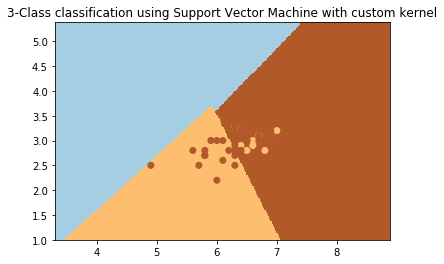

In [28]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#example-svm-plot-custom-kernel-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (0  1)  Y.T
                
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

# Полезные ссылки
* [OpenML](https://www.openml.org/search?type=data) - классный ресурс с данными